# Lab 1

In [107]:
import numpy as np
import random as rd
import string
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
# generator matrix
G = np.array([[1,0,0,1,0],
              [0,1,0,1,1],
              [0,0,1,0,1]])

In [68]:
def int2bits(n, length=3):
    res = bin(n)[2:]
    for i in range(3-len(res)):
        res = '0' + res
    res = [1 if digit=='1' else 0 for digit in res]
    return np.array(res)

def encoder(x):
    x = np.array(x)
    assert(len(x) == 3 and np.count_nonzero((x!=0) & (x!=1)) == 0)
    return np.dot(x, G)%2

def all_codewords(G):
    C = []
    for i in range(2**(G.shape[0])):
        C.append(encoder(int2bits(i)))
    return C

In [13]:
for i in range(8):
    print("".join(str(b) for b in int2bits(i))+'->'+ "".join(str(b) for b in encoder(int2bits(i))))

000->00000
001->00101
010->01011
011->01110
100->10010
101->10111
110->11001
111->11100


In [17]:
def channel_llr(u, sigma):
    noise = np.random.normal(0, sigma, len(u))
    return 2*(1-2*u + noise)/(sigma**2)

def HD(llr):
    return (llr <= 0).astype(int)

In [88]:
def MAP_decoder(llr, C, sigma):
    y = llr * (sigma**2) / 2 # from llr to y
    M = 0
    res = []
    for c in C:
        prob = np.prod(np.exp(-(y - (1-2*c))**2/2/(sigma**2)))
        if prob >= M:
            M = prob
            res = c[:G.shape[0]]
    return res

def ML_decoder_sum_abs(llr, C, sigma):
    M = np.inf
    res = []
    for c in C:
        s = np.sum(np.abs(llr - 2*(1-2*c)/sigma**2))
        if s < M:
            M = s
            res = c[:G.shape[0]]
    return res

def ML_decoder_max(llr, C, sigma):
    M = np.inf
    res = []
    for c in C:
        s = np.max(np.abs(llr - 2*(1-2*c)/sigma**2))
        if s < M:
            M = s
            res = c[:G.shape[0]]
    return res

def ML_decoder_sum_sq(llr, C, sigma):
    M = np.inf
    res = []
    for c in C:
        s = np.sum((llr - 2*(1-2*c)/sigma**2)**2)
        if s < M:
            M = s
            res = c[:G.shape[0]]
    return res

In [103]:
def run_mc(decoder, sigma, C, N = 10000):
    bers = []
    fers = []
    for s in sigma:
        ber = 0
        fer = 0
        if s == sigma[-1]:
            N = 10000000
        for i in range(N):
            u = int2bits(int(rd.uniform(0, 2**G.shape[0])))
            c = encoder(u)
            llr = channel_llr(c, s)
            out = decoder(llr, C, s)
            diff = out != u
            ber = ber + np.count_nonzero(diff)
            fer = fer + np.any(diff)
        fers.append(fer / N)
        bers.append(ber / N / G.shape[0])
    return (fers, bers)

In [104]:
sigma = np.arange(0.3, 0.91, 0.1)

In [108]:
def plot(sigma, decoders, C, savefile='plot.png'):
    # decoders -- array of tuples (decoder, name)
    inBER = [norm.cdf(-1/s) for s in sigma]
    for decoder in decoders:
        fer, ber = run_mc(decoder[0], sigma)
        plt.plot(inBER, fer, label = decoder[1]+', FER')
        plt.plot(inBER, ber, label = decoder[1] + ', BER')
        pd.DataFrame(data={'InBER': inBER, 'FER':fer, 'ber': ber}).to_csv(decoder[1]+'.csv')
    plt.grid()
    plt.legend()
    plt.xlabel('InBER')
    plt.ylabel('BER/FER')
    plt.yscale('log')
    plt.savefig(savefile)
    plt.show()

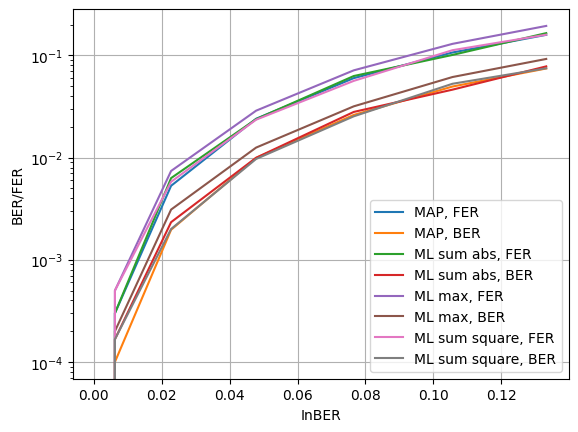

In [109]:
plot(sigma, [(MAP_decoder, 'MAP'), 
             (ML_decoder_sum_abs, 'ML sum abs'), 
             (ML_decoder_max, 'ML max'), 
             (ML_decoder_sum_sq, 'ML sum square')], 
             all_codewords(G))

# Lab 2

In [ ]:
H = np.array([[1,1,0,1,0],
              [0,1,1,0,1]])

In [ ]:
def MinSum_decoder(llr, H, s): # s is just for compatibility, not used
    M = initial_step(llr)
    for i in range(iter_num):
        E = horz_step(M, H)
        L, M = vert_step(E, llr, H)
        if is_finish(L, H):
            return HD(L)
    return HD(L)

def Quantizer_liner(llr, bitwidth):
    return # YOUR CODE

def Quantizer_log(llr, bitwidth):
    return # YOUR CODE